<a href="https://colab.research.google.com/github/20173132hanaram/-/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [ ]:
np.shape(y_data)

(6, 1)

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
 

W = tf.Variable(tf.random_normal([2,1]), name='weight')

b = tf.Variable(tf.random_normal([1]), name='bias')

In [ ]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * (tf.log(1 - hypothesis)))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [ ]:
sess = tf.InteractiveSession()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost =[]

In [ ]:
for step in range(10001):
    cost_val,  _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
    vcost.append(cost_val)
    if step % 1000 == 0:
        print(step, '\t', cost_val)

0 	 3.011408
1000 	 0.4991727
2000 	 0.41358826
3000 	 0.35121667
4000 	 0.30272105
5000 	 0.2646657
6000 	 0.23443651
7000 	 0.21006884
8000 	 0.19012694
9000 	 0.17356913
10000 	 0.1596365


Text(0, 0.5, 'cost')

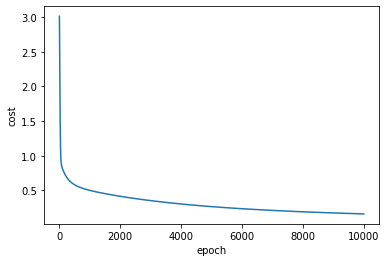

In [ ]:
plt.plot(vcost)
plt.xlabel('epoch')
plt.ylabel('cost')

In [ ]:
sess.run(hypothesis,feed_dict={X:[[5,3]]} )

In [ ]:
sess.run(predicted,feed_dict={X:[[5,3]]} )

array([[1.]], dtype=float32)

In [ ]:
sess.run(hypothesis,feed_dict={X:[[4,3]]} )

array([[0.77225274]], dtype=float32)

In [ ]:
sess.run(predicted,feed_dict={X:[[4,3]]} )

array([[1.]], dtype=float32)

In [ ]:
sess.run(hypothesis,feed_dict={X:[[1,0.2]]} )

array([[0.02213592]], dtype=float32)